In [4]:
import ffmpeg
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from time import time

In [5]:
file = "E:\\subset\\[강도] 실내(원본)_01\\178-1_robbery02_place02_night\\178-1_cam01_robbery02_place02_night_spring.mp4"
width, height = (640, 480)

In [6]:
starttime = time()
config = {
    "hwaccel_output_format": "cuda",
    "c:v": "hevc_cuvid",
    "ss": "00:02:44.7",
    "t": "00:02:19.6",
}
frames, _ = (
    ffmpeg
    .input(file, **config)
    .filter('fps', fps=1/5, round='up')
    .filter('scale', size='640x480')
    .output('pipe:', format='rawvideo', pix_fmt='rgb24')
    .run(capture_stdout=True)
)
frames = (
    np
    .frombuffer(frames, np.uint8)
    .reshape([-1, height, width, 3])
)
elapsed = time() - starttime
elapsed

18.29141616821289

In [9]:
frames.shape

(27, 480, 640, 3)

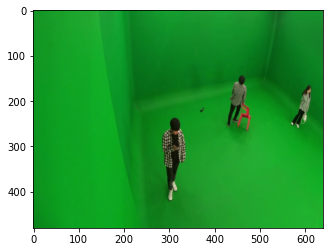

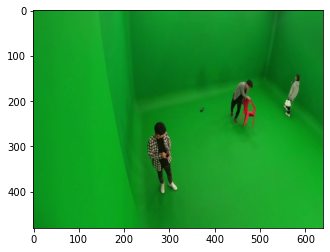

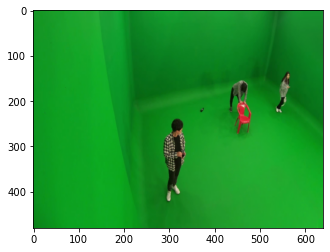

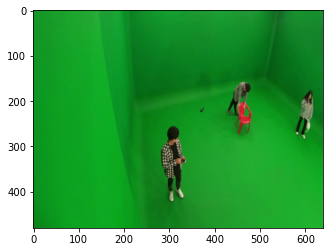

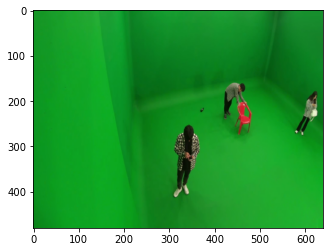

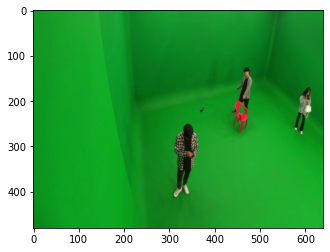

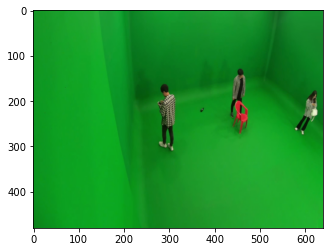

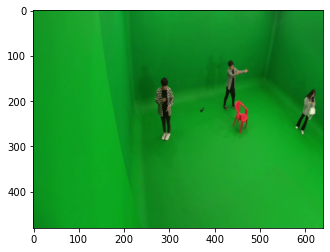

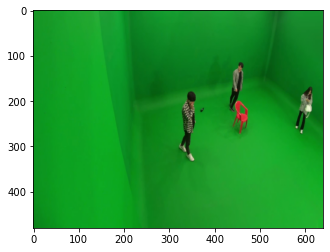

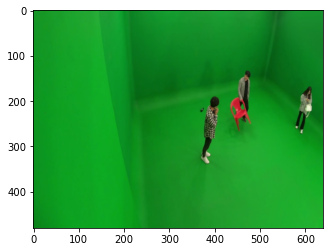

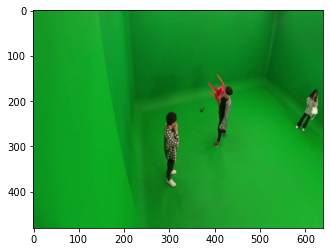

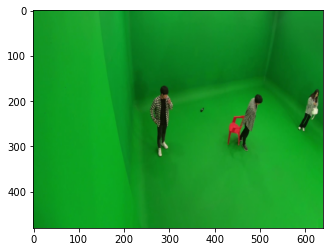

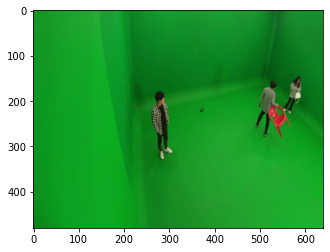

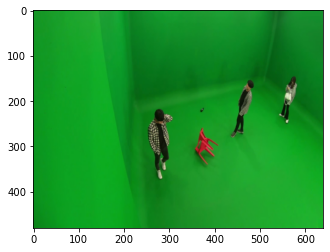

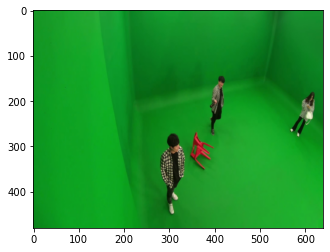

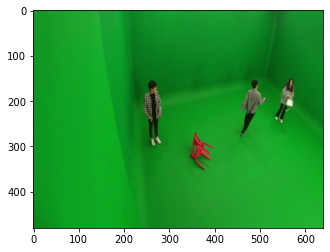

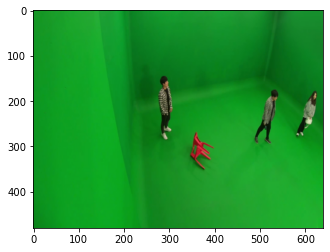

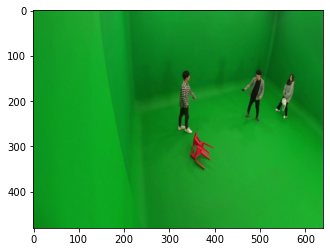

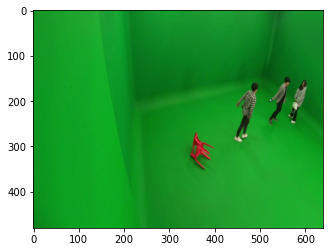

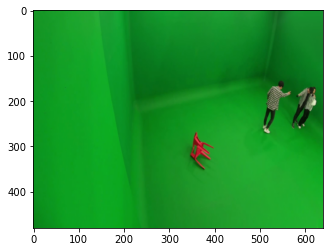

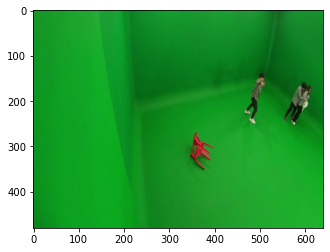

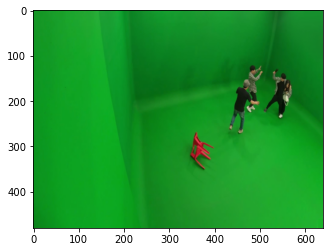

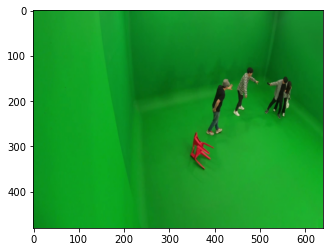

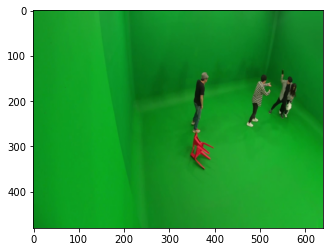

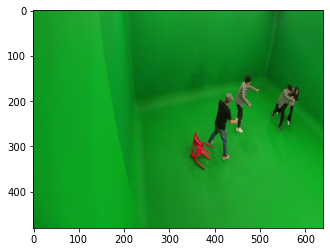

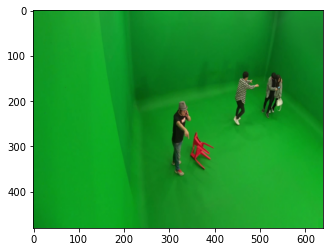

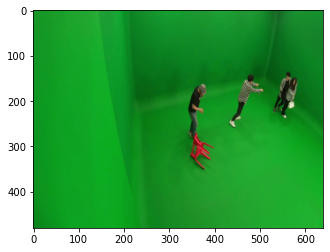

In [8]:
for f in frames:
    plt.imshow(f)
    plt.show()

In [20]:
from datasets.dataset import *
def preprocess_raw_data(root_path: str) -> np.ndarray:
    classes, class_to_idx = find_classes(root_path)
    samples = make_dataset(root_path, class_to_idx, ('mp4'))

    clips = []
    targets = []
    num_samples = len(samples)
    cnt = 0
    starttime = time()
    for file, target in samples:
        targets.append(target)
        clips.append(create_clip(file))
        cnt += 1
        print(f"{cnt}/{num_samples} complete, {(cnt / num_samples) * 100}%")
        elapsed = time() - starttime
        avg = elapsed / cnt
        print(f"avg {avg}, estimation {avg * num_samples}")
        print(len(clips[0]))
        break

    return np.array((clips, targets))
preprocess_raw_data("E:\\subset")

E:\subset\[강도] 실내(원본)_01\178-1_robbery02_place02_night\178-1_cam01_robbery02_place02_night_spring.mp4 clip created
1/1101 complete, 0.09082652134423251%
avg 8.704910039901733, estimation 9584.105953931808
3


array([[array([[[[ 40,  40,  40, ...,  49,  49,  49],
         [ 41,  41,  41, ...,  49,  49,  49],
         [ 41,  41,  41, ...,  49,  49,  49],
         ...,
         [ 26,  26,  26, ...,  43,  43,  43],
         [ 26,  26,  26, ...,  43,  43,  43],
         [ 30,  30,  30, ...,  43,  43,  43]],

        [[ 37,  37,  37, ...,  47,  47,  47],
         [ 37,  37,  37, ...,  47,  47,  47],
         [ 37,  37,  37, ...,  47,  47,  47],
         ...,
         [ 20,  20,  20, ...,  43,  43,  43],
         [ 20,  20,  20, ...,  43,  43,  43],
         [ 24,  24,  24, ...,  43,  43,  43]],

        [[ 35,  35,  35, ...,  47,  47,  47],
         [ 35,  35,  35, ...,  47,  47,  47],
         [ 35,  35,  35, ...,  47,  47,  47],
         ...,
         [ 26,  28,  28, ...,  43,  43,  43],
         [ 22,  24,  24, ...,  43,  43,  43],
         [ 24,  26,  26, ...,  43,  43,  43]],

        ...,

        [[ 40,  40,  38, ...,  49,  49,  49],
         [ 40,  40,  38, ...,  49,  49,  49],
         [

In [11]:
import datasets.preprocessing

In [13]:
r = datasets.preprocessing.create_clip(file)

In [14]:
r.shape

(3, 9, 720, 1280)